In [1]:
# 1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용합니다.
# 46개의 토픽을 가지고 있음.

## 데이터셋 로드하기

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [10]:
print(len(train_data))
print(len(test_data))

8982
2246


## 로이터 데이터셋을 텍스트로 디코딩하기

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [12]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터 인코딩하기

In [13]:
import numpy as np

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [47]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
from keras.utils.np_utils import to_categorical

In [17]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


## 모델 구성

In [18]:
from keras import models, layers

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [20]:
## 모델 컴파일하기

In [21]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=412, validation_data=(x_val, y_val))

Epoch 1/20
20/20 [==============================] - 1s 34ms/step - loss: 2.3853 - accuracy: 0.5547 - val_loss: 1.5662 - val_accuracy: 0.6770
Epoch 2/20
20/20 [==============================] - 1s 26ms/step - loss: 1.2768 - accuracy: 0.7181 - val_loss: 1.2176 - val_accuracy: 0.7380
Epoch 3/20
20/20 [==============================] - 1s 38ms/step - loss: 0.9498 - accuracy: 0.7937 - val_loss: 1.0794 - val_accuracy: 0.7700
Epoch 4/20
20/20 [==============================] - 1s 38ms/step - loss: 0.7307 - accuracy: 0.8450 - val_loss: 1.0230 - val_accuracy: 0.7750
Epoch 5/20
20/20 [==============================] - 1s 45ms/step - loss: 0.5723 - accuracy: 0.8785 - val_loss: 0.9178 - val_accuracy: 0.8050
Epoch 6/20
20/20 [==============================] - 1s 32ms/step - loss: 0.4491 - accuracy: 0.9027 - val_loss: 0.9198 - val_accuracy: 0.8050
Epoch 7/20
20/20 [==============================] - 1s 32ms/step - loss: 0.3587 - accuracy: 0.9257 - val_loss: 0.8970 - val_accuracy: 0.8150
Epoch 8/20
20

In [26]:
import matplotlib.pyplot as plt

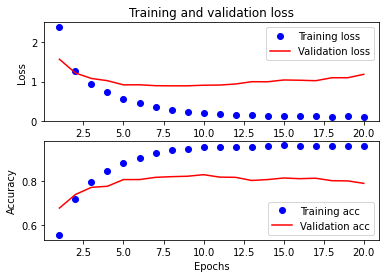

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.subplot(211)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(212)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# model을 처음부터 다시 훈련하기

In [54]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [55]:
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 22ms/step - loss: 2.0781 - accuracy: 0.5566 - val_loss: 1.4255 - val_accuracy: 0.6790
Epoch 2/20
63/63 [==============================] - 1s 21ms/step - loss: 1.1659 - accuracy: 0.7349 - val_loss: 1.1761 - val_accuracy: 0.7420
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 0.8350 - accuracy: 0.8094 - val_loss: 1.1382 - val_accuracy: 0.7560
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 0.6055 - accuracy: 0.8609 - val_loss: 1.0988 - val_accuracy: 0.7800
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 0.4475 - accuracy: 0.9007 - val_loss: 1.1371 - val_accuracy: 0.7870
Epoch 6/20
63/63 [==============================] - 1s 20ms/step - loss: 0.3398 - accuracy: 0.9278 - val_loss: 1.1605 - val_accuracy: 0.7800
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.2737 - accuracy: 0.9396 - val_loss: 1.2408 - val_accuracy: 0.7790
Epoch 8/20
63

In [48]:
predictions = model.predict(x_test)

In [53]:
np.argmax(predictions[0])

3

In [56]:
len(x_test)

2246